# Analisando o engajamento do Instagram

### O que queremos responder?

- Qual tipo de conteúdo **mais engaja** no Instagram da minha empresa?
<br><br>
- Temos a base de dados do Instagram **desde que o usuário começou a postar na marca até o dia 27/março**
<br><br>
- Ele também dá alguns direcionamentos:
    - Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio)o vazio)

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
# Importando os dados
dados =  pd.read_excel('08. Analisando o engajamento no Instagram.xlsx')

# Verificando as 5 primeiras linhas
dados.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,"82,878.00",Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


In [181]:
# Verificando os tipos de Dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tipo           52 non-null     object        
 1   Data           52 non-null     datetime64[ns]
 2   Curtidas       52 non-null     int64         
 3   Comentários    52 non-null     int64         
 4   Visualizações  15 non-null     float64       
 5   Tags           44 non-null     object        
 6   Pessoas        52 non-null     object        
 7   Campanhas      52 non-null     object        
 8   Carrossel      8 non-null      object        
 9   Interacoes     52 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 4.2+ KB


In [182]:
# verificando valores nulos
dados.isnull().sum()

Tipo              0
Data              0
Curtidas          0
Comentários       0
Visualizações    37
Tags              8
Pessoas           0
Campanhas         0
Carrossel        44
Interacoes        0
dtype: int64

In [183]:
# verficando qtd colunas e colunas 
dados.shape

(52, 10)

### Como ele pediu para não considerar a coluna visualizações, vamos retirar essa coluna da base

In [185]:
# Excluindo a Coluna 'Visualizações' debtro do nosso modelo nã vamos precisar
dados = dados.drop('Visualizações', axis=1)

### Carrossel possui apenas 8 valores não nulos
- Vamos entender os valores de carrossel

In [187]:
dados.Carrossel.value_counts()

Carrossel
S    8
Name: count, dtype: int64

- Na verdade, os valores nulos são de postagens que não são carrossel. Sendo assim o nulo deveria ser "N"

### Tratando os valores nulos

In [190]:
# Aqui buscamos as linhas que estão com valores nulos na coluna carrosel
dados.loc[dados.Carrossel.isnull()].head(10)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437
6,Foto,2021-09-19,21597,852,Novos Produtos,S,S,NaN,22449
7,Foto,2021-09-25,6346,33,Produtos,N,S,NaN,6379
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,NaN,4137
10,Reels,2021-10-10,12894,249,Trends/Produtos,S,N,NaN,13143
11,Foto,2021-10-12,17831,391,NaN,S,S,NaN,18222


In [191]:
# aqui buscamos todas linhas que NAO estão nulos
dados.loc[dados.Carrossel.notnull()].head(10)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
12,Foto,2021-10-21,6166,55,Novos Produtos,S,S,S,6221
21,Foto,2021-12-23,8328,93,Produtos,S,N,S,8421
25,Foto,2022-01-02,12193,138,Novos Produtos,S,N,S,12331
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939
28,Foto,2022-01-15,9936,119,Novos Produtos,S,N,S,10055
40,Foto,2022-02-21,21621,213,Influenciadores,S,S,S,21834


In [192]:
# agora ao final estamos filtrando no paramentro final a coluna
dados.loc[dados.Carrossel.isnull(),'Carrossel'].head(10)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
6     NaN
7     NaN
9     NaN
10    NaN
11    NaN
Name: Carrossel, dtype: object

In [193]:
# Filtro na coluna carrosel com (N)
dados.loc[dados.Carrossel.isnull(),'Carrossel']='N'
dados.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


In [194]:
# verificando se ainda tem dados nulos
dados.loc[dados.Carrossel.isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes


**Verificando novamente os valores de Carrossel:**

dados.info()

In [197]:
# veridicando as estatísticas
dados.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.00,52.00,52.00
mean,2021-12-23 04:36:55.384615424,"12,262.73",189.50,"12,452.23"
min,2021-09-11 00:00:00,"2,807.00",9.00,"2,816.00"
25%,2021-10-23 06:00:00,"5,492.00",69.50,"5,562.50"
50%,2022-01-05 00:00:00,"9,603.00",128.00,"9,773.50"
75%,2022-02-15 12:00:00,"17,621.75",265.25,"17,920.75"
max,2022-03-27 00:00:00,"37,351.00",852.00,"37,853.00"
std,NaN,"8,165.88",170.69,"8,299.39"


In [198]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários
#dados.plot(kind="scatter",x="Data",y="Curtidas",figsize=(14,8));

Text(0.5, 1.0, 'Correlação entre curtidas x Datas')

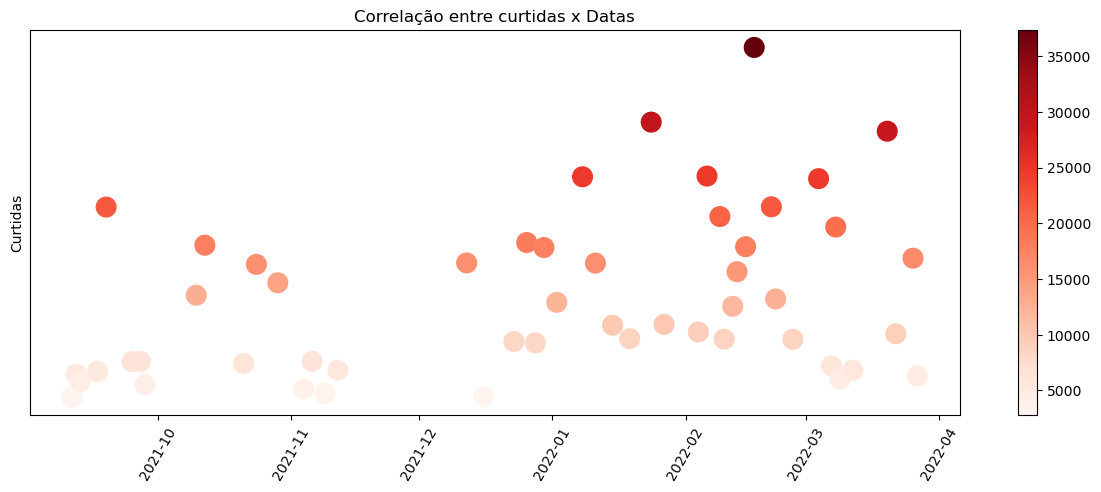

In [199]:
plt.figure(figsize=(15,5))
plt.scatter(dados['Data'], dados['Curtidas'], s=200, c= dados['Curtidas'], cmap='Reds',)
plt.colorbar()

plt.yticks([])
#plt.tick_params(axis='x', length=0)
#plt.box(False)
plt.xticks(rotation=60)

#plt.xlabel('Data')
plt.ylabel('Curtidas')
plt.title ('Correlação entre curtidas x Datas')

In [200]:
# Coloacnso em ordem descrescente pela coluna "Curtidas"
dados.sort_values(by='Curtidas', ascending=False).head()


,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


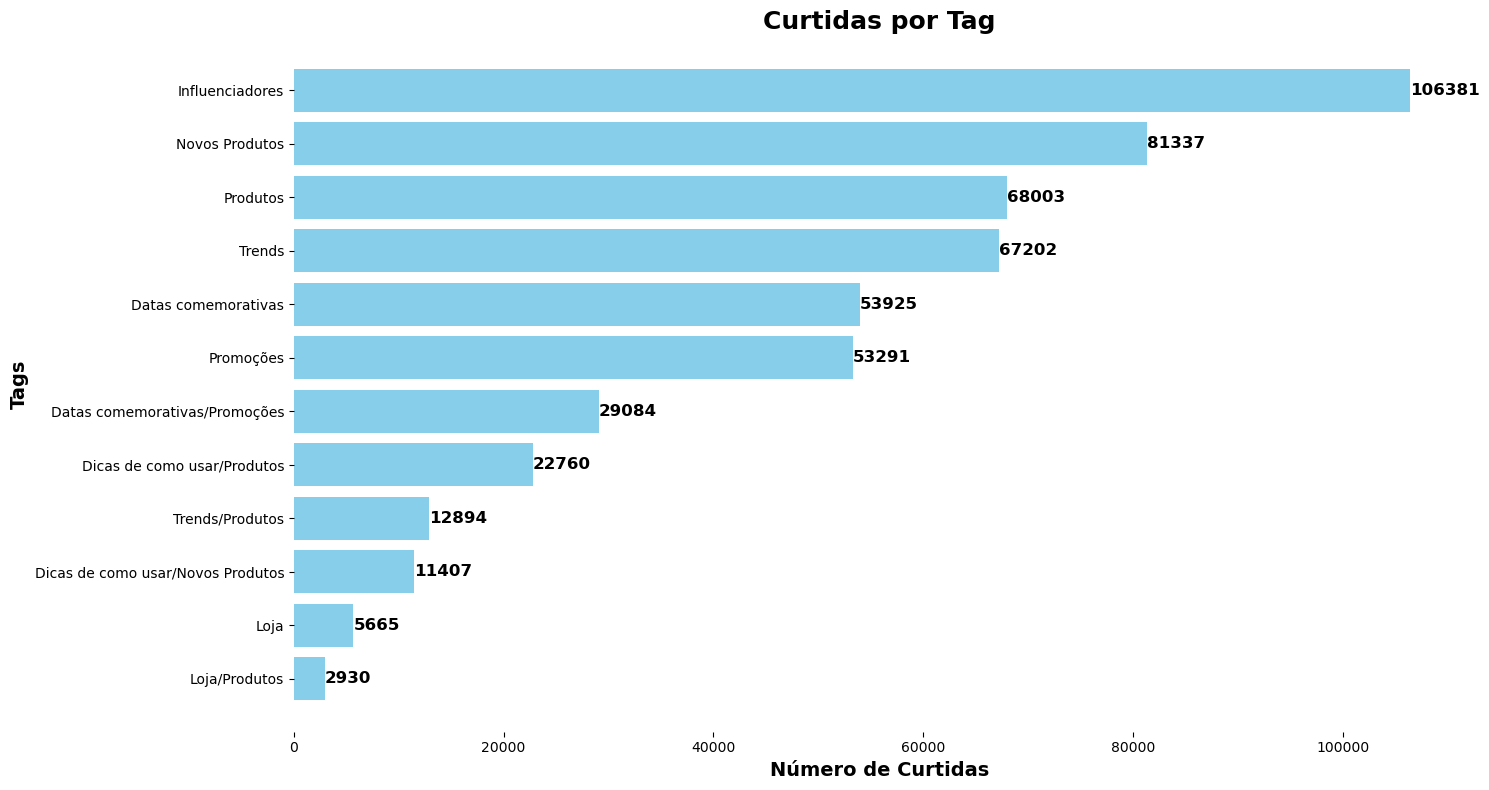

In [201]:
import matplotlib.pyplot as plt

# Agrupar e ordenar os dados
dados_agrupado = dados.groupby('Tags')['Curtidas'].sum().sort_values(ascending=True)

# Criar o gráfico de barras horizontal
plt.figure(figsize=(15, 8))
plt.barh(dados_agrupado.index, dados_agrupado.values, color='skyblue')

# Adicionar título e rótulos
plt.title('Curtidas por Tag', fontsize=18, fontweight='bold')
plt.xlabel('Número de Curtidas', fontsize=14, fontweight='bold')
plt.ylabel('Tags', fontsize=14, fontweight='bold' )
plt.box(False)

# Adicionar os valores nas barras
for i, v in enumerate(dados_agrupado.values):
    plt.text(v + 10, i, str(v), va='center', fontsize=12, color='black',fontweight='bold')

# Exibir o gráfico
plt.tight_layout()
plt.show()



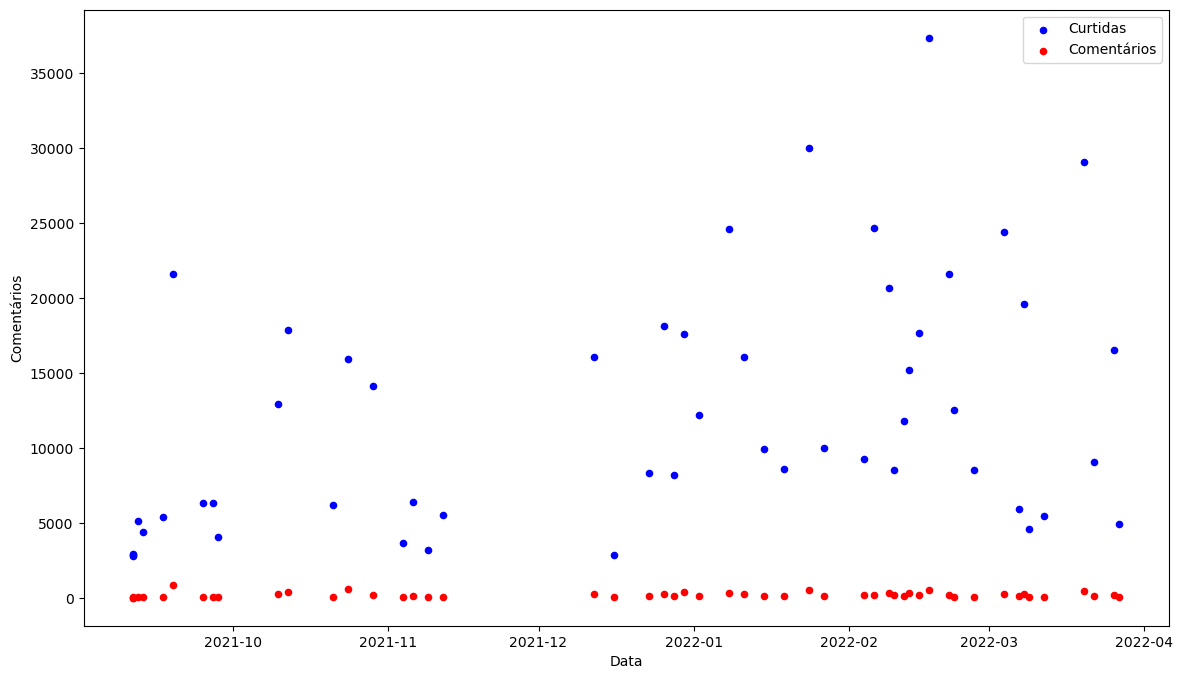

In [202]:
# Podemos colocar curtidas e comentários no mesmo gráfico
ax = dados.plot(kind="scatter",x="Data",y="Curtidas",color="blue",label="Curtidas",figsize=(14,8));
dados.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8),ax=ax);

### A primeira coisa que podemos fazer é pegar os 5 primeiros registros com mais e menos curtidas

In [204]:
# Ordenando os valores
dados.sort_values(by="Curtidas",ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [205]:
# Ordenando os valores
dados.sort_values(by="Curtidas",ascending=False).tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


- Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas
<br><br>
- **Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**

In [207]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format


In [208]:
# Agrupando as informações por tipo
dados.groupby("Tipo")["Curtidas"].mean()

Tipo
Foto    13,341.14
IGTV     6,833.40
Reels   14,873.00
Vídeo    8,141.50
Name: Curtidas, dtype: float64

In [209]:
# Agrupando as informações por tipo
dados.groupby("Pessoas")["Comentários"].sum()

Pessoas
N     634
S    9220
Name: Comentários, dtype: int64

In [210]:
# Agrupando por Tipo e Pessoas
dados.groupby(["Tipo","Pessoas"])["Curtidas"].mean()


Tipo   Pessoas
Foto   N          3,863.50
       S         15,236.67
IGTV   S          6,833.40
Reels  N          5,934.50
       S         20,832.00
Vídeo  N          4,007.50
       S         16,409.50
Name: Curtidas, dtype: float64

In [211]:
dados.groupby(["Tipo","Pessoas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                       
Foto  N        3,863.50        29.50
      S       15,236.67       226.20
IGTV  S        6,833.40       133.60
Reels N        5,934.50        98.00
      S       20,832.00       342.00
Vídeo N        4,007.50        65.25
      S       16,409.50       370.00

In [212]:
# Incluindo a coluna de campanhas
dados.groupby(["Tipo","Pessoas","Campanhas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas Campanhas                       
Foto  N       N          2,869.00        20.50
              S          5,852.50        47.50
      S       N         10,815.29       159.93
              S         19,105.38       284.19
IGTV  S       N          6,833.40       133.60
Reels N       N          5,934.50        98.00
      S       N         12,894.00       249.00
              S         24,801.00       388.50
Vídeo N       N          4,007.50        65.25
      S       S         16,409.50       370.00

In [213]:
# Somente para pessoas
dados.groupby("Pessoas")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Pessoas,,
N,"4,256.67",52.83
S,"14,664.55",230.50


- **Postagens com pessoas engajam muito mais para essa marca, sendo 3 vezes maior de quando não tem pessoas**

In [215]:
# Somente para campanhas
dados.groupby("Campanhas")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Campanhas,,
N,"7,928.33",123.17
S,"18,173.27",279.95


- **Quando é uma postagem de campanha, o engajamento também é melhor!**

In [217]:
# Carrossel sem filtrar a base -> ESTÁ ERRADO ESSA COMPARAÇÃO
dados.groupby("Carrossel")[["Curtidas",'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,"12,343.61",198.43
S,"11,817.88",140.38


In [218]:
# Podemos também filtrar a base
dados[dados.Tipo == "Foto"].groupby(["Carrossel"])[["Curtidas","Comentários"]].mean()

,Curtidas,Comentários
Carrossel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


- **A média sem usar carrossel é melhor do que quando usamos, então não é algo que possa impactar tanto no resultado das mídias dessa empresa olhando inicialmente**
    - Nesse caso devemos filtrar apenas as fotos pois só temos carrossel em fotos. Sem esse filtro estaríamos comparando coisas erradas

**Colocando pessoas e campanhas juntos podemos ver como se dá essa diferença**

In [221]:
# Agregando por pessoas e campanhas
dados.groupby(["Pessoas","Campanhas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N          3,937.50        53.90
        S          5,852.50        47.50
S       N          9,923.75       157.80
        S         19,405.35       303.20

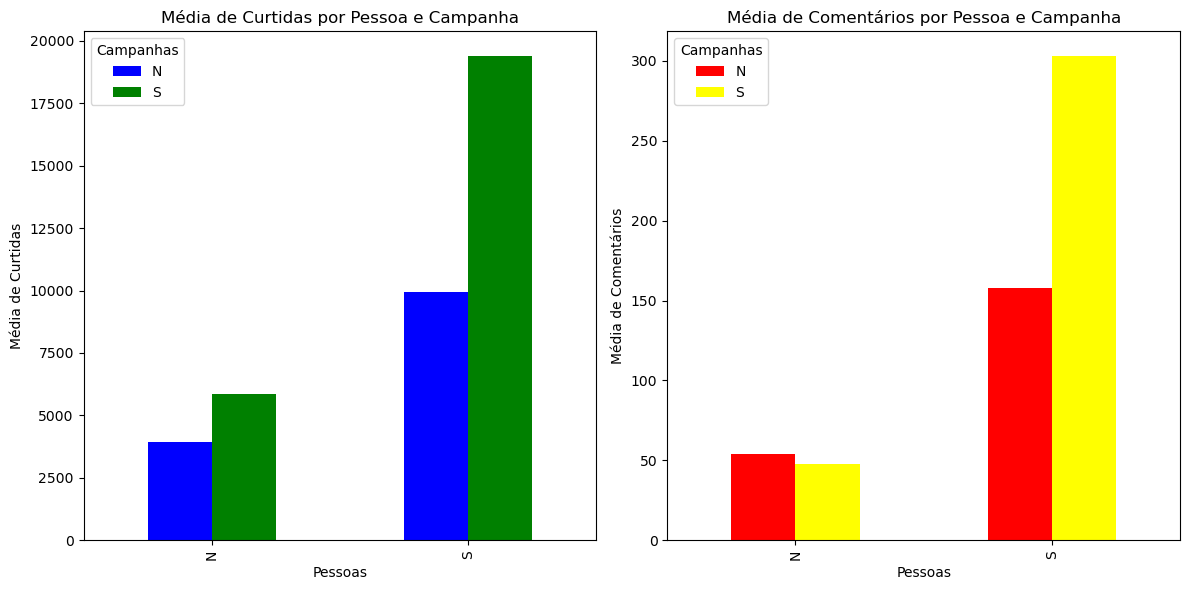

In [222]:
import pandas as pd
import matplotlib.pyplot as plt



# Agrupando os dados por pessoas e campanhas, calculando a média
media_dados = dados.groupby(["Pessoas", "Campanhas"])[["Curtidas", "Comentários"]].mean()

# Plotando os gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de Curtidas
media_dados['Curtidas'].unstack().plot(kind='bar', ax=axes[0], color=['blue', 'green'])
axes[0].set_title('Média de Curtidas por Pessoa e Campanha')
axes[0].set_xlabel('Pessoas')
axes[0].set_ylabel('Média de Curtidas')

# Gráfico de Comentários
media_dados['Comentários'].unstack().plot(kind='bar', ax=axes[1], color=['red', 'yellow'])
axes[1].set_title('Média de Comentários por Pessoa e Campanha')
axes[1].set_xlabel('Pessoas')
axes[1].set_ylabel('Média de Comentários')

plt.tight_layout()
plt.show()


- **A média quando tem pessoas E é publicação de campanhas é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha passa para quase 10 mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas**
<br><br>
- **Nesse caso a gente já consegue mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento**

In [224]:
# Agregando por pessoas, campanhas e tipo
dados.groupby(["Pessoas","Campanhas","Tipo"])[["Curtidas","Comentários"]].mean()

Curtidas  Comentários
Pessoas Campanhas Tipo                        
N       N         Foto   2,869.00        20.50
                  Reels  5,934.50        98.00
                  Vídeo  4,007.50        65.25
        S         Foto   5,852.50        47.50
S       N         Foto  10,815.29       159.93
                  IGTV   6,833.40       133.60
                  Reels 12,894.00       249.00
        S         Foto  19,105.38       284.19
                  Reels 24,801.00       388.50
                  Vídeo 16,409.50       370.00

- **Analisando novamente a questão do vídeo, ele não parece mais tão ruim assim. Quando feito em campanha e usando pessoas ele teve um resultado bom, inclusive próximo a foto**
- O que poderia ter levado a média baixa é que só temos vídeo ou COM pessoa e COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoa ou campanha)
- Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

#### Inclusive podemos entender o que havia gerado a média baixo no vídeo

In [227]:
# Vamos filtrar a base apenas onde o tipo é Vídeo
dados[dados.Tipo == 'Vídeo']

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


**Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo.
Quando o vídeo foi feito com pessoas aproveitando trends e datas comemorativas o resultado foi muito bom!**

## Conclusões
- **Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que não possui ninguém**
- **Postagens em épocas de campanha também possuem um melhor engajamento**
- **Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca**

# Análise Extra
## Quando agrupamos por Tags  Encontramos colunas com duas configuração  e precisamos tratar isso.

In [231]:
dados.groupby("Tags")["Curtidas"].mean()

Tags
Datas comemorativas                 17,975.00
Datas comemorativas/Promoções       29,084.00
Dicas de como usar/Novos Produtos    5,703.50
Dicas de como usar/Produtos          7,586.67
Influenciadores                     15,197.29
Loja                                 2,832.50
Loja/Produtos                        2,930.00
Novos Produtos                      11,619.57
Produtos                             5,666.92
Promoções                           26,645.50
Trends                              22,400.67
Trends/Produtos                     12,894.00
Name: Curtidas, dtype: float64

In [270]:
#Vamos usar isso para a nossa coluna "Tags"
#Transformando a coluna. Tags em uma lista de tags
dados['Tags'] = dados['Tags'].str.split('/')

dados.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,N,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,N,2958
2,Foto,2021-09-11,2807,9,[Loja],N,N,N,2816
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,N,5164
4,Foto,2021-09-13,4392,45,[Produtos],S,N,N,4437


In [274]:
# Separando a coluna Tag em 1 linha para cada elemento da 
dados = dados.explode('Tags')
dados.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164


In [276]:
dados.groupby("Tags")["Curtidas"].mean()

Tags
Datas comemorativas   20,752.25
Dicas de como usar     6,833.40
Influenciadores       15,197.29
Loja                   2,865.00
Novos Produtos        10,304.89
Produtos               6,269.82
Promoções             27,458.33
Trends                20,024.00
Name: Curtidas, dtype: float64

In [286]:
# Ordenando por curtidas
dados.groupby("Tags")[["Curtidas","Comentários"]].mean().sort_values("Curtidas", ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67




- Postagens de promoções são as que mais engajam
- Além de promoções, datas comemorativas e trends também possuem um bom engajamento

In [291]:
#Fazendo para Pessoas e Tag  
dados.groupby(['Pessoas','Tags'])[['Curtidas','Comentários']].mean()

Curtidas  Comentários
Pessoas Tags                                      
N       Loja                 2,865.00        17.67
        Novos Produtos       5,359.00        62.00
        Produtos             4,450.67        60.78
S       Datas comemorativas 20,752.25       343.50
        Dicas de como usar   6,833.40       133.60
        Influenciadores     15,197.29       161.71
        Novos Produtos      10,923.12       215.62
        Produtos             8,316.38       131.62
        Promoções           27,458.33       531.00
        Trends              20,024.00       352.25

In [293]:
#Fazendo para Pessoas e Tag  
dados.groupby(['Pessoas','Tags'])[['Curtidas','Comentários']].mean().sort_values("Curtidas", ascending=False)

Curtidas  Comentários
Pessoas Tags                                      
S       Promoções           27,458.33       531.00
        Datas comemorativas 20,752.25       343.50
        Trends              20,024.00       352.25
        Influenciadores     15,197.29       161.71
        Novos Produtos      10,923.12       215.62
        Produtos             8,316.38       131.62
        Dicas de como usar   6,833.40       133.60
N       Novos Produtos       5,359.00        62.00
        Produtos             4,450.67        60.78
        Loja                 2,865.00        17.67

In [297]:
#Fazendo para Pessoas e Tag  
dados.groupby(['Campanhas','Tags'])[['Curtidas','Comentários']].mean().sort_values("Curtidas", ascending=False)

Curtidas  Comentários
Campanhas Tags                                      
S         Promoções           33,217.50       490.50
          Trends              22,400.67       386.67
          Datas comemorativas 20,752.25       343.50
          Influenciadores     18,715.40       197.60
N         Promoções           15,940.00       612.00
          Trends              12,894.00       249.00
S         Novos Produtos      11,040.67       323.00
N         Novos Produtos       9,937.00       136.33
S         Produtos             9,074.00        67.50
N         Dicas de como usar   6,833.40       133.60
          Influenciadores      6,402.00        72.00
          Produtos             5,895.93        97.67
          Loja                 2,865.00        17.67


**CONCLUSÂO**
- Ter o rosto de outras pessoas é fundamental para um bom engajamento na publicação
  * Em todas as tags, quando tinha o rosto, o resultado foi melhor
- Criar campanhas ajudou muito na divulgação da marca
- Promoções tiveram um desempenho absurdamente maior do que qualquer outra tag
  * Porém é uma tag que pode ter custo para a loja, o que deve ser analisado
- Usar conteúdos que estão em trend também ajudam na divulgação da marca, mesmo a trend sendo de outrosichos
  - A melhor maneira de mostrar produtos é através de outras pessoas usando-os, e se possível em campanhas de datas especiais
- Para novos produtos a inclusão de pessoas é mais eficaz ainda, sendo que uma campanha pode ainda mais impactar
- Não podemos afirmar que a tag Loja é ruim até testarmos essa tag incluindo pessoas ou em uma campanha. Vale o teste para verificar
- Continuaremos a monitorar as postagens para encontrar novos padrões do que ainda temos poucas informa
ções de base